In [2]:
#important libraries

import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
#sample 3D data set

np.random.seed(4)

m=60
w1,w2=0.1,0.3
noise=0.1

angles=np.random.rand(m)*3*np.pi/2-0.5
X=np.empty((m,3))
X[:,0]=np.cos(angles)+np.sin(angles)/2+noise*np.random.randn(m)/2
X[:,1]=np.sin(angles)*0.7+noise*np.random.randn(m)/2
X[:,2]=X[:,0]*w1+X[:,1]*w2+noise*np.random.randn(m)

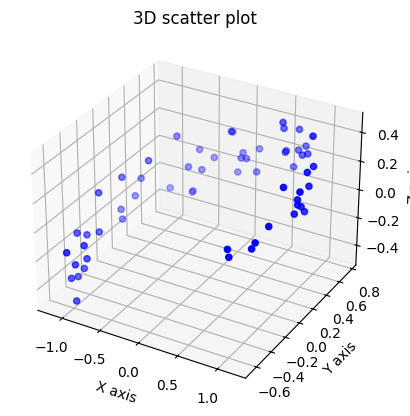

In [4]:
#Visualization

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0],X[:,1],X[:,2], color="b", marker="o")

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("3D scatter plot")
plt.show()

In [5]:
X.shape

(60, 3)

In [6]:
X_centered=X-X.mean(axis=0)
U,s,Vt=np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]
c1,c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

In [7]:
s

array([6.77645005, 2.82403671, 0.78116597])

In [8]:
m,n=X.shape

S=np.zeros(X_centered.shape)
S

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [9]:
S[:n, :n]=np.diag(s)
S

array([[6.77645005, 0.        , 0.        ],
       [0.        , 2.82403671, 0.        ],
       [0.        , 0.        , 0.78116597],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [10]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [11]:
W2=Vt.T[:,:2]
X2D=X_centered.dot(W2)
X2D.shape

(60, 2)

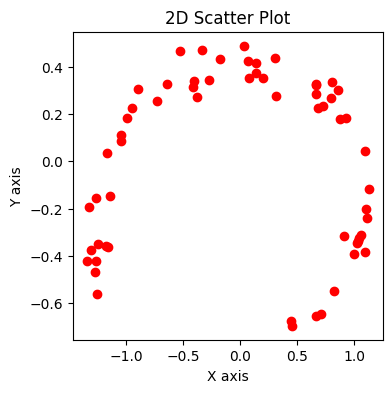

In [12]:
plt.figure(figsize=(4,4))
plt.scatter(X2D[:,0], X2D[:,1], color="r", marker="o")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("2D Scatter Plot")
plt.show()

In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X2D_pca=pca.fit_transform(X)


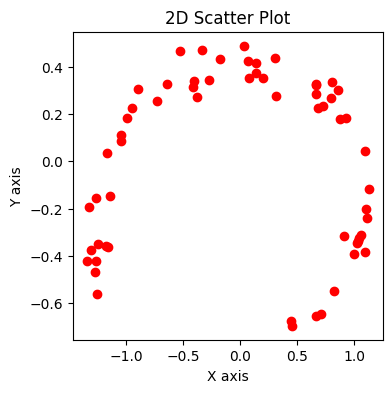

In [14]:
plt.figure(figsize=(4,4))
plt.scatter(X2D_pca[:,0], X2D_pca[:,1], color="r", marker="o")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("2D Scatter Plot")
plt.show()

In [15]:
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [16]:
X2D_pca[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [17]:
np.allclose(X2D, X2D_pca)

True

In [18]:
X3D_inv=pca.inverse_transform(X2D_pca)

In [19]:
np.allclose(X,X3D_inv)

False

In [20]:
np.mean(np.sum(np.square(X3D_inv-X), axis=1))

np.float64(0.01017033779284855)

In [21]:
X3D_inv_using_svd=X2D.dot(Vt[:2,:])

In [22]:
np.allclose(X3D_inv_using_svd, X3D_inv-pca.mean_)

True

In [23]:
pca.mean_

array([0.02406745, 0.20932515, 0.07155422])

In [24]:
pca.components_

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [25]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [26]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [27]:
1-pca.explained_variance_ratio_.sum()

np.float64(0.011195535570688975)

In [28]:
np.square(s)/np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

In [29]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, as_frame=False)


In [30]:
mnist.target=mnist.target.astype(np.uint8)

In [31]:
from sklearn.model_selection import train_test_split

X=mnist["data"]
y=mnist["target"]

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [32]:
pca=PCA()
pca.fit_transform(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

np.int64(154)

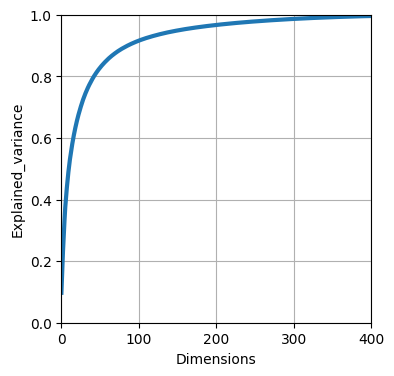

In [33]:
plt.figure(figsize=(4,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0,400,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained_variance")
plt.grid(True)
plt.show()

In [34]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train)

In [35]:
pca.n_components_

np.int64(154)

In [36]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503684424557437)

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced=inc_pca.fit_transform(X_train)

In [38]:
X_recovered=inc_pca.inverse_transform(X_reduced)

In [39]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [40]:
import time

for n_components in (2,10,154):
    print("n_components=", n_components)
    regular_pca=PCA(n_components=n_components, svd_solver="full")
    inc_pca=IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca=PCA(n_components=n_components, random_state=4, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca),("Inc PCA", inc_pca),("Rnd PCA", rnd_pca)):
        t1=time.time()
        pca.fit_transform(X_train)
        t2=time.time()
        print("   {}:{:.1f} seconds".format(name, t2-t1))

n_components= 2
   PCA:4.0 seconds
   Inc PCA:9.6 seconds
   Rnd PCA:1.0 seconds
n_components= 10
   PCA:3.9 seconds
   Inc PCA:8.3 seconds
   Rnd PCA:1.7 seconds
n_components= 154
   PCA:4.0 seconds
   Inc PCA:12.0 seconds
   Rnd PCA:3.1 seconds


In [42]:
from sklearn.decomposition import KernelPCA

rbf_pca=KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.decomposition import KernelPCA

from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target=mnist.target.astype(np.uint8)
X=mnist["data"]
y=mnist["target"]

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X[:1000], y[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [2]:
grid_search.best_params_

{'kpca__gamma': np.float64(0.03222222222222222), 'kpca__kernel': 'rbf'}

In [3]:
rbf_pca=KernelPCA(n_components=2, kernel="rbf", gamma=0.0322, fit_inverse_transform=True)
X_reduced=rbf_pca.fit_transform(X[:1000])
X_preimage=rbf_pca.inverse_transform(X_reduced)

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X[:1000], X_preimage)

np.float64(4277.735993499247)

In [6]:
from sklearn.datasets import make_swiss_roll

X,t=make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


In [7]:
from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced=lle.fit_transform(X)

In [9]:
#Exercise 9

from sklearn.datasets import fetch_openml

mnist=fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target=mnist.target.astype(np.uint8)

X=mnist["data"]
y=mnist["target"]


In [10]:
X_train=X[:60000]
y_train=y[:60000]

X_test=X[60000:]
y_test=y[60000:]

In [11]:
from sklearn.ensemble import RandomForestClassifier

rdn_clf=RandomForestClassifier(n_estimators=100, random_state=42)


In [12]:
import time

t1=time.time()
rdn_clf.fit(X_train,y_train)
t2=time.time()

In [13]:
print("trainig  took {:.2f}s".format(t2-t1))

trainig  took 32.97s


In [14]:
from sklearn.metrics import accuracy_score

y_pred=rdn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [15]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)

In [16]:
rdn_clf2=RandomForestClassifier(n_estimators=100, random_state=42)
t1=time.time()
rdn_clf2.fit(X_train_reduced, y_train)
t2=time.time()

In [17]:
print("Training took {:.2f}s".format(t2-t1))

Training took 102.20s


In [18]:
X_test_reduced=pca.transform(X_test)
y_pred=rdn_clf2.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9488

In [19]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t1=time.time()
log_clf.fit(X_train, y_train)
t2=time.time()

/home/cmatpcuser/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/cmatpcuser/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print("Training took {:.2f}s".format(t2 - t1))

Training took 11.33s


In [21]:
y_pred=log_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9255

In [22]:
log_clf2=LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t1=time.time()
log_clf2.fit(X_train_reduced, y_train)
t2=time.time()


/home/cmatpcuser/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/cmatpcuser/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print("Training took {:.2f}s".format(t2 - t1))

Training took 3.21s


In [24]:
y_pred=log_clf2.predict(X_test_reduced)
accuracy_score(y_pred,y_test)

0.9201

In [26]:
#Exercise 10

np.random.seed(42)

m=10000
idx=np.random.permutation(60000)[:m]

X=mnist['data'][idx]
y=mnist['target'][idx]

In [27]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, random_state=42)
X_reduced=tsne.fit_transform(X)

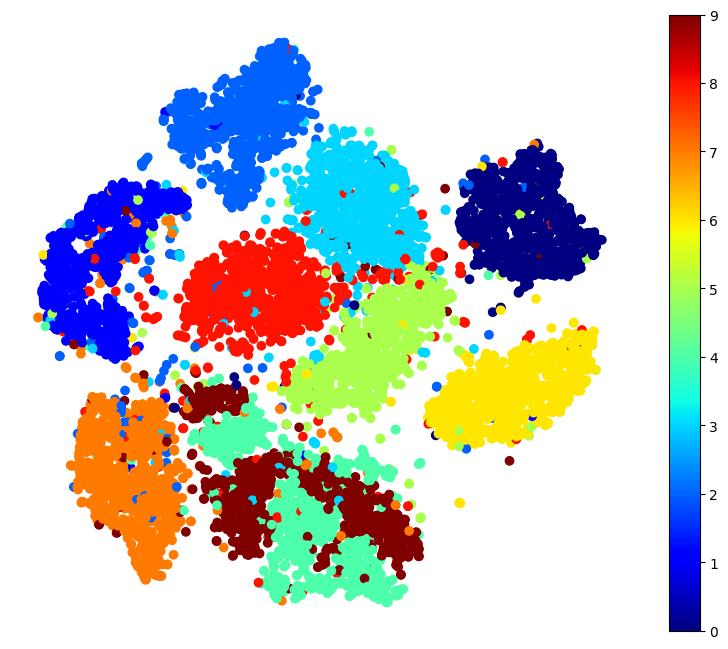

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

/tmp/ipykernel_425725/613504727.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=mpl.cm.get_cmap("jet")


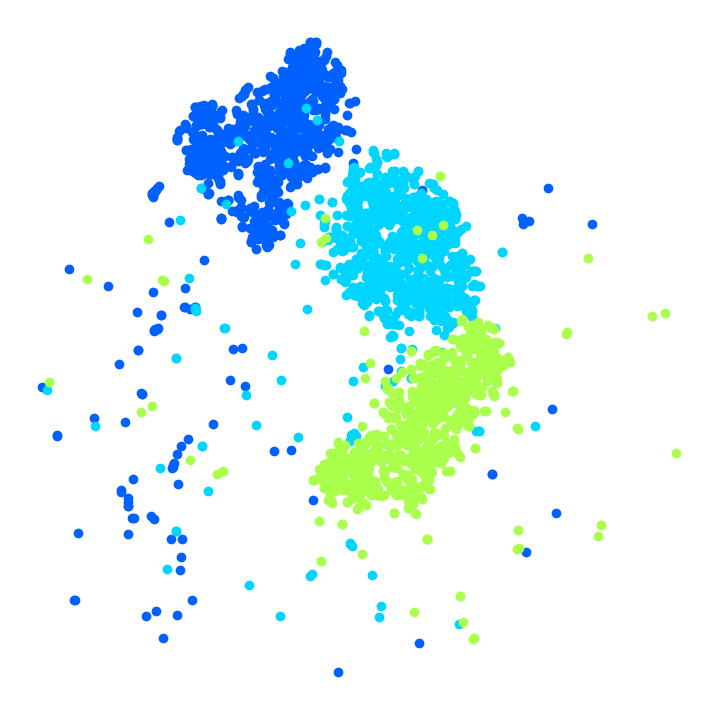

In [33]:
import matplotlib as mpl

plt.figure(figsize=(9,9))
cmap=mpl.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_reduced[y==digit,0], X_reduced[y==digit,1],c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [35]:
idx=(y==2)|(y==3)|(y==5)

X_subset=X[idx]
y_subset=y[idx]

tsne_subset=TSNE(n_components=2, random_state=42)
X_subset_reduced=tsne_subset.fit_transform(X_subset)

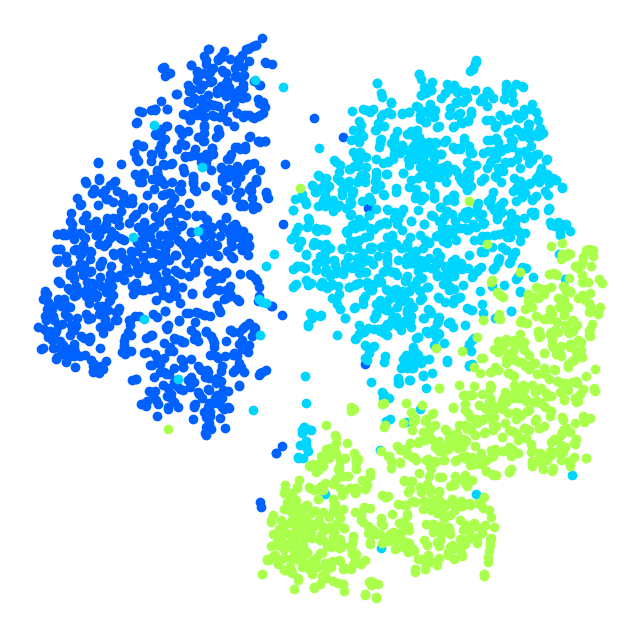

In [36]:
plt.figure(figsize=(8,8))

for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset==digit,0], X_subset_reduced[y_subset==digit,1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

t-SNE took 28.46s.


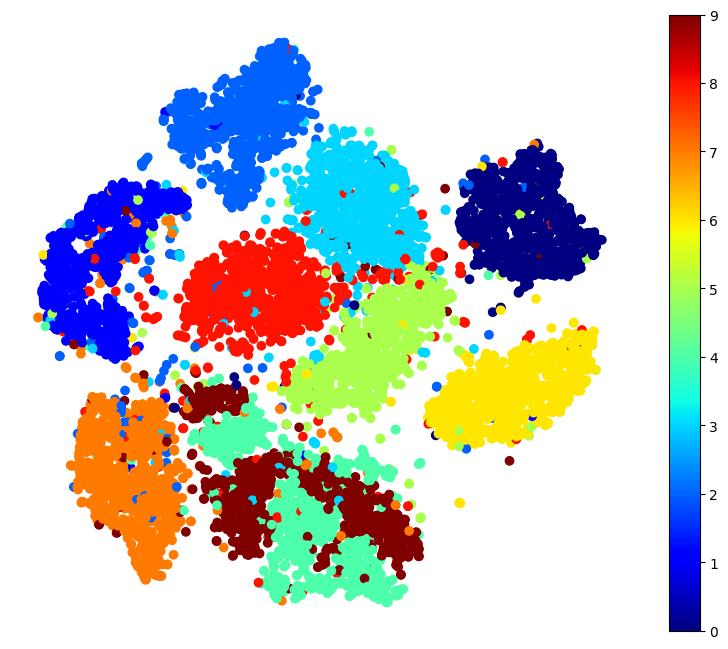

In [37]:
from sklearn.manifold import TSNE

t1=time.time()
X_tsne_reduced=TSNE(n_components=2, random_state=42).fit_transform(X)
t2=time.time()
print("t-SNE took {:.2f}s.".format(t2-t1))
plt.figure(figsize=(10,8))
plt.scatter(X_tsne_reduced[:,0],X_tsne_reduced[:,1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

PCA+TSNE took 26.37s.


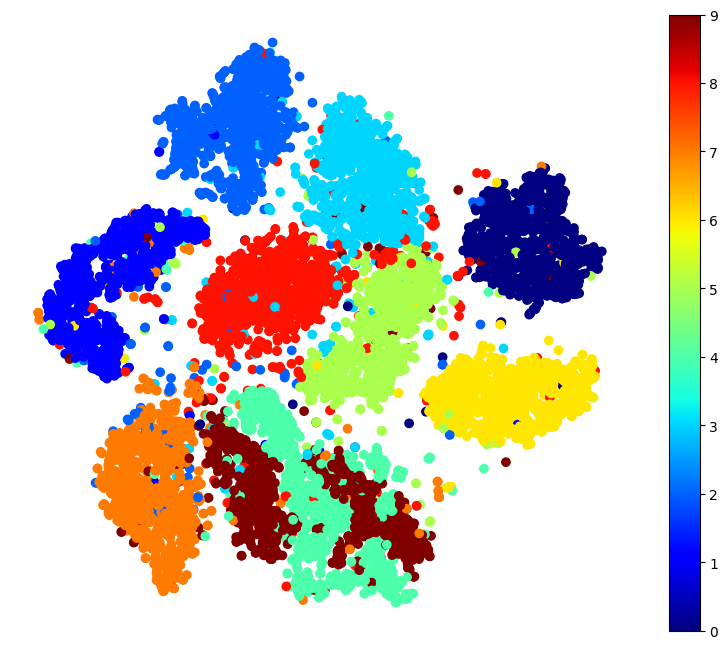

In [39]:
from sklearn.pipeline import Pipeline

pca_tsne=Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

t1=time.time()
X_pca_tsne_reduced=pca_tsne.fit_transform(X)
t2=time.time()
print("PCA+TSNE took {:.2f}s.".format(t2-t1))

plt.figure(figsize=(10,8))
plt.scatter(X_pca_tsne_reduced[:,0],X_pca_tsne_reduced[:,1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()